In [2]:
import pandas as pd
df = pd.read_csv("heights.csv")
df.head()

,name,height
0,mohan,1.2
1,maria,2.3
2,sakib,4.9
3,tao,5.1
4,virat,5.2


In [3]:
df.describe()

,height
count,20.000000
mean,8.390000
std,8.782812
min,1.200000
25%,5.350000
50%,5.700000
75%,6.275000
max,40.200000


Detect outliers using IQR

In [4]:
Q1 = df.height.quantile(0.25)
Q3 = df.height.quantile(0.75)
Q1, Q3

(5.3500000000000005, 6.275)

In [5]:
IQR = Q3 - Q1
IQR

0.9249999999999998

In [6]:
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit, upper_limit


(3.962500000000001, 7.6625)

Here are the outliers

In [7]:
df[(df.height<lower_limit)|(df.height>upper_limit)]

,name,height
0,mohan,1.2
1,maria,2.3
17,aamir,14.5
18,ken,23.2
19,Liu,40.2


Remove outliers

In [8]:
df_no_outlier = df[(df.height>lower_limit)&(df.height<upper_limit)]
df_no_outlier

,name,height
2,sakib,4.9
3,tao,5.1
4,virat,5.2
5,khusbu,5.4
6,dmitry,5.5
7,selena,5.5
8,john,5.6
9,imran,5.6
10,jose,5.8
11,deepika,5.9


<h1>Exercise: Outlier Detection and Removal Using IQR</h1>


You are given height_weight.csv file which contains heights and weights of 1000 people. Dataset is taken from here, https://www.kaggle.com/mustafaali96/weight-height

You need to do this,

(1) Load this csv in pandas dataframe and first plot histograms for height and weight parameters

(2) Using IQR detect weight outliers and print them

(3) Using IQR, detect height outliers and print them

In [10]:
df= pd.read_csv("height_weight.csv")
df.head()

,gender,height,weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


Histgram for weights

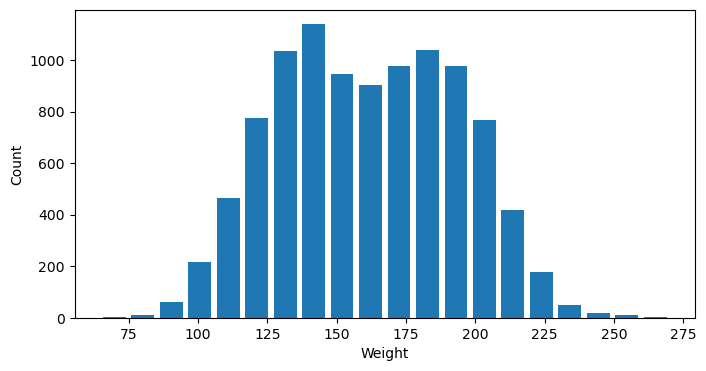

In [14]:
plt.hist(df.weight, bins=20, rwidth=0.8)
plt.xlabel('Weight')
plt.ylabel('Count')
plt.show()

Histgram for heights



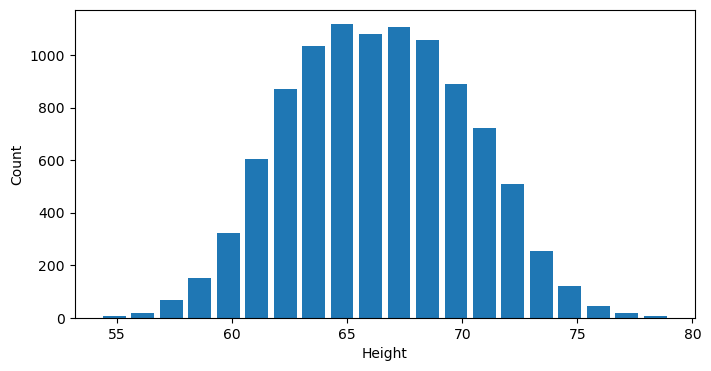

In [15]:
plt.hist(df.height, bins=20, rwidth=0.8)
plt.xlabel('Height')
plt.ylabel('Count')
plt.show()

Detect outliers based on weight

In [16]:
Q1 = df.weight.quantile(0.25)
Q3 = df.weight.quantile(0.75)
Q1, Q3

(135.8180513055015, 187.16952486868348)

In [17]:
IQR = Q3 - Q1
IQR

51.35147356318197

In [18]:
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit, upper_limit

(58.79084096072856, 264.19673521345646)

In [19]:
df.weight.describe()

count    10000.000000
mean       161.440357
std         32.108439
min         64.700127
25%        135.818051
50%        161.212928
75%        187.169525
max        269.989699
Name: weight, dtype: float64

In [20]:
df[(df.weight<lower_limit)|(df.weight>upper_limit)]

,gender,height,weight
2014,Male,78.998742,269.989699


Detect outliers based on height

In [21]:
Q1 = df.height.quantile(0.25)
Q3 = df.height.quantile(0.75)
Q1, Q3

(63.505620481218955, 69.1742617268347)

In [22]:
IQR = Q3 - Q1
IQR

5.668641245615746

In [23]:
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit, upper_limit

(55.00265861279534, 77.67722359525831)

In [24]:
df[(df.height<lower_limit)|(df.height>upper_limit)]

,gender,height,weight
994,Male,78.095867,255.690835
1317,Male,78.462053,227.342565
2014,Male,78.998742,269.989699
3285,Male,78.528210,253.889004
3757,Male,78.621374,245.733783
6624,Female,54.616858,71.393749
7294,Female,54.873728,78.606670
9285,Female,54.263133,64.700127


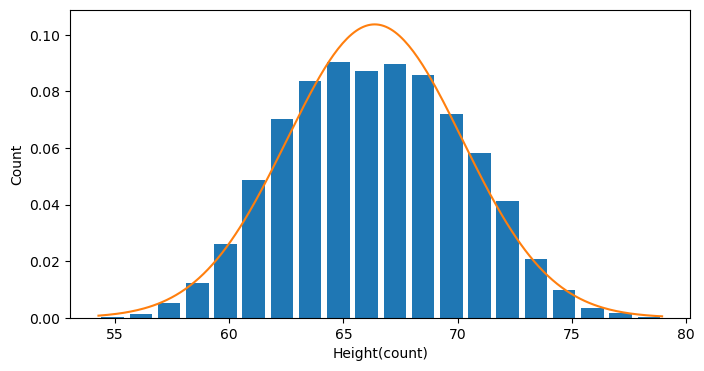

In [13]:
from scipy.stats import norm
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (8,4)

plt.hist(df.height, bins= 20, rwidth=0.8, density=True)
plt.xlabel("Height(count)")
plt.ylabel("Count")
rng= np.arange(df.height.min(),df.height.max(), 0.1)
plt.plot(rng, norm.pdf(rng, df.height.mean(), df.height.std()))


In [26]:
import tensorflow as tf

In [27]:
print(tf.__version__)

2.12.0
